# Car Finance Data

## Import statements

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Load Data

In [2]:
cars = "data/car_financing.xlsx"
df = pd.read_excel(cars)
df.head()

,Month,Starting Balance,Repayment,Interest Paid,Principal Paid,New Balance,term,interest_rate,car_type
0,1,34689.96,687.23,202.93,484.30,34205.66,60,0.0702,Toyota Sienna
1,2,34205.66,687.23,200.10,487.13,33718.53,60,0.0702,Toyota Sienna
2,3,33718.53,687.23,197.25,489.98,33228.55,60,0.0702,Toyota Sienna
3,4,33228.55,687.23,194.38,492.85,32735.70,60,0.0702,Toyota Sienna
4,5,32735.70,687.23,191.50,495.73,32239.97,60,0.0702,Toyota Sienna


## Check differnt car types

Can see that Toyota Corolla is repeated but one is spelt with an 'a'. Will need to replace these values.

In [3]:
df['car_type'].value_counts()

VW Golf R         144
Toyota Carolla    111
Toyota Sienna      60
Toyota Corolla     33
Name: car_type, dtype: int64

### Change Toyota Carolla

Function that if the cell contains Toyota Carolla then it will change it to Toyo

In [4]:
def changeToyota(cell):
    if 'Toyota Carolla' in cell:
        toyota = 'Toyota Corolla'
        return toyota
    else:
        return cell

Take the dataframe car type values and map them with the function written above. Map will mean each item will be iterated through the function changeToyota, meaning it will check to see if each value contains Toyota Carolla and change it, if not it will just return the original value.

In [5]:
df['car_type'] = df['car_type'].map(changeToyota)

Check to see if the car type has changed

In [6]:
df['car_type'].value_counts()

Toyota Corolla    144
VW Golf R         144
Toyota Sienna      60
Name: car_type, dtype: int64

## Checking for Null values

We can see there are 408 entries for each column. In interest paid there is only 407 non-null values meaning there is one null value :(

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 9 columns):
Month               348 non-null int64
Starting Balance    348 non-null float64
Repayment           348 non-null float64
Interest Paid       347 non-null float64
Principal Paid      348 non-null float64
New Balance         348 non-null float64
term                348 non-null int64
interest_rate       348 non-null float64
car_type            348 non-null object
dtypes: float64(6), int64(2), object(1)
memory usage: 24.5+ KB


Create a variable which stores the value as true if the value is null. Then locate that true value.

In [8]:
interest_null = df['Interest Paid'].isna()
df.loc[interest_null, :]

,Month,Starting Balance,Repayment,Interest Paid,Principal Paid,New Balance,term,interest_rate,car_type
35,36,15940.06,687.23,NaN,593.99,15346.07,60,0.0702,Toyota Sienna


Locate the data within the dataframe to see the values around it and decide what to do. Can see that the values decrease as the index increases. Can therefore use a linear model to fill the value as this finds the line of best fit and adds the value based on that. Can see the value for 35 should be 93.235, we can therefore add 93.24 to that row.

In [9]:
df['Interest Paid'][30:40]

30    110.32
31    106.94
32    103.55
33    100.13
34     96.70
35       NaN
36     89.77
37     86.27
38     82.76
39     79.22
Name: Interest Paid, dtype: float64

In [10]:
df['Interest Paid'][30:40].interpolate(method = 'linear')

30    110.320
31    106.940
32    103.550
33    100.130
34     96.700
35     93.235
36     89.770
37     86.270
38     82.760
39     79.220
Name: Interest Paid, dtype: float64

In [11]:
df.loc[interest_null, 'Interest Paid'] = 93.24

We can now see that the value has been filled in

In [12]:
df['Interest Paid'][30:40]

30    110.32
31    106.94
32    103.55
33    100.13
34     96.70
35     93.24
36     89.77
37     86.27
38     82.76
39     79.22
Name: Interest Paid, dtype: float64

## Renaming Columns so that they match

Current we have some that use spaces and some the use underscores. Want to make them consistent, and having no spaces makes it easier to reference.

In [13]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
df.head()

,month,starting_balance,repayment,interest_paid,principal_paid,new_balance,term,interest_rate,car_type
0,1,34689.96,687.23,202.93,484.30,34205.66,60,0.0702,Toyota Sienna
1,2,34205.66,687.23,200.10,487.13,33718.53,60,0.0702,Toyota Sienna
2,3,33718.53,687.23,197.25,489.98,33228.55,60,0.0702,Toyota Sienna
3,4,33228.55,687.23,194.38,492.85,32735.70,60,0.0702,Toyota Sienna
4,5,32735.70,687.23,191.50,495.73,32239.97,60,0.0702,Toyota Sienna


## Analysis

I want to compare the car type with the interest paid overtime. To see what would be the best car to purchase and repay over a 60 month repayment contract.
Have to first filter the data so we get the right columns.

### Filter so we only have the 60 month term

In [14]:
term_filter = df['term']==60

#For VW
carVW = df['car_type']=='VW Golf R'
vwSixty = df.loc[term_filter & carVW, :]

#For Toyota Sienna
carTS = df['car_type']=='Toyota Sienna'
tsSixty = df.loc[term_filter & carTS]

#For Toyota Corolla
carTC = df['car_type']=='Toyota Corolla'
tcSixty = df.loc[term_filter & carTC]

In [15]:
monthVW = vwSixty.loc[:, 'month'].values
interestVW = vwSixty.loc[:, 'interest_paid'].values

monthTS = tsSixty.loc[:, 'month'].values
interestTS = tsSixty.loc[:, 'interest_paid'].values

monthTC = tcSixty.loc[:, 'month'].values
interestTC = tcSixty.loc[:, 'interest_paid'].values

Text(0.5,1,'Interest of Cars over a period of 60 Months')

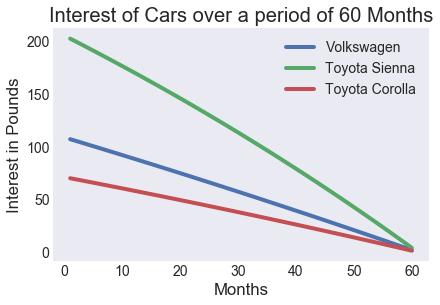

In [30]:
plt.style.use('seaborn-deep')

plt.plot(monthVW, interestVW, label="Volkswagen")
plt.plot(monthTS, interestTS, label="Toyota Sienna")
plt.plot(monthTC, interestTC, label="Toyota Corolla")

plt.legend()

plt.xlabel('Months')
plt.ylabel('Interest in Pounds')
plt.title('Interest of Cars over a period of 60 Months')

Text(0.5,1,'Total balance of different Cars over a period of 60 Months')

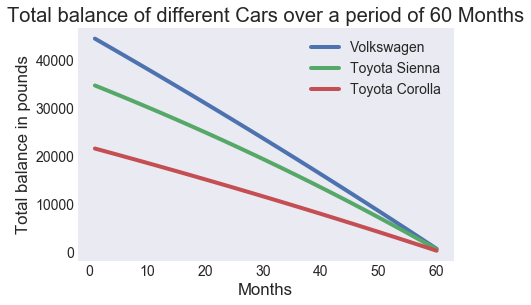

In [29]:
plt.style.use('seaborn-deep')

#Gonna try with starting balance now
startBalVW = vwSixty.loc[:, 'starting_balance'].values
startBalTS = tsSixty.loc[:, 'starting_balance'].values
startBalTC = tcSixty.loc[:, 'starting_balance'].values

plt.plot(monthVW, startBalVW, label="Volkswagen")
plt.plot(monthTS, startBalTS, label="Toyota Sienna")
plt.plot(monthTC, startBalTC, label="Toyota Corolla")

plt.legend()
plt.xlabel('Months')
plt.ylabel('Total balance in pounds')
plt.title('Total balance of different Cars over a period of 60 Months')

In [25]:
plt.style.available

['bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn',
 'Solarize_Light2',
 'tableau-colorblind10',
 '_classic_test']